# Laburo con los datos experimentales

El objetivo de éste notebook es trabajar con los resultados experimentales (generados con `exp_k_alpha.py`). El código que genera los gráficos disponibles en el informe debería estar en su completitud aquí.

Primero que todo tenemos que cargar los datos experimentales:

In [1]:
from pickle import load
from gzip import open as zopen

with zopen('data.pickle.gz') as file:
    df = load(file)

df

,kind,k,alpha,elapsed_time,pca_init_and_fit_time,pca_transform_time,knn_init_and_fit_time,knn_predict_time,y_pred,y_test,y_fold_pred,y_fold_test
0,knnpca,1,1.0,5473120128,2.598776e+09,235056397.0,187226,2639100516,"[7.0, 0.0, 2.0, 2.0, 7.0, 1.0, 7.0, 2.0, 9.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 4.0, 5.0, 1.0, 8.0, 7.0, 6.0, 7.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
1,knnpca,2,1.0,5575963044,2.598776e+09,235056397.0,146870,2741983788,"[1.0, 0.0, 2.0, 2.0, 7.0, 1.0, 3.0, 2.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 4.0, 5.0, 1.0, 3.0, 7.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
2,knnpca,3,1.0,5737825042,2.598776e+09,235056397.0,185627,2903807029,"[1.0, 0.0, 2.0, 2.0, 7.0, 1.0, 3.0, 2.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 6.0, 5.0, 1.0, 3.0, 3.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
3,knnpca,4,1.0,5679472451,2.598776e+09,235056397.0,232890,2845407175,"[1.0, 0.0, 2.0, 2.0, 7.0, 7.0, 3.0, 5.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[7.0, 6.0, 5.0, 1.0, 8.0, 3.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
4,knnpca,5,1.0,5718439245,2.598776e+09,235056397.0,205614,2884401245,"[1.0, 0.0, 2.0, 7.0, 7.0, 7.0, 5.0, 5.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[7.0, 6.0, 5.0, 1.0, 8.0, 3.0, 6.0, 4.0, 4.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,knn,26,NaN,716552634872,NaN,NaN,209053599,716343581273,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4646,knn,27,NaN,660746681464,NaN,NaN,238334395,660508347069,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4647,knn,28,NaN,604904267144,NaN,NaN,213043046,604691224098,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4648,knn,29,NaN,566102875095,NaN,NaN,200959077,565901916018,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."


Los datos contienen tanto información de corridas utilizando tano KNN+PCA (`kind == 'knnpca'`) cómo KNN a secas (`kind == 'knn'`) así que separémoslos.

In [2]:
df_knnpca = df[df['kind'] == 'knnpca']
df_knn = df[df['kind'] == 'knn']

print(f'Hay {len(df_knnpca)} corridas usando KNN + PCA')
print(f'Hay {len(df_knn)} corridas usando KNN a secas')

Hay 4500 corridas usando KNN + PCA
Hay 150 corridas usando KNN a secas


Hecho ésto, podemos empezar a explorar los datos usando las bibliotecas de python de siempre.

In [3]:
# Importemos todo :P
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### KNN

Los datos tienen toda la información de evaluación necesaria para evaluar diversas métricas. Podemos usar las implementaciones propias de scikit para trabajar con éstas.

In [4]:
from sklearn.metrics import accuracy_score

knn_accuracy_column = df_knn.apply(
    func=lambda row: accuracy_score(row['y_fold_test'], row['y_fold_pred']),
    axis=1
)
df_knn_accuracy = df_knn[['k']].copy()
df_knn_accuracy['accuracy'] = knn_accuracy_column
df_knn_accuracy

,k,accuracy
4500,1,0.964116
4501,2,0.956293
4502,3,0.962585
4503,4,0.959524
4504,5,0.960884
...,...,...
4645,26,0.943707
4646,27,0.942857
4647,28,0.942517
4648,29,0.942687


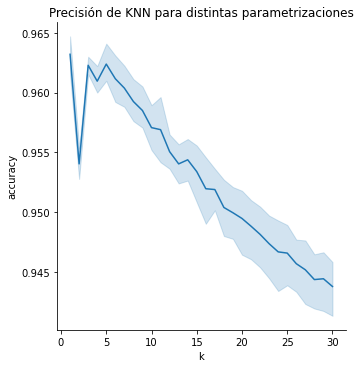

In [5]:
sns.relplot(data=df_knn_accuracy, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNN para distintas parametrizaciones')

### KNN + PCA

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo total')

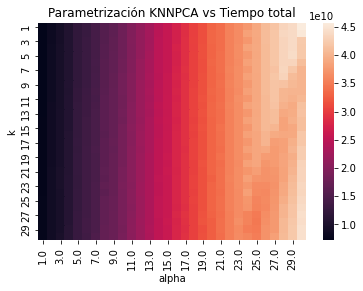

In [6]:
tiempos_totales = df_knnpca.pivot_table(index='k', columns='alpha', values='elapsed_time', aggfunc=np.mean)
sns.heatmap(tiempos_totales).set_title('Parametrización KNNPCA vs Tiempo total')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

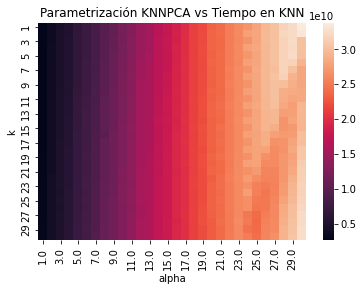

In [7]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='knn_predict_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

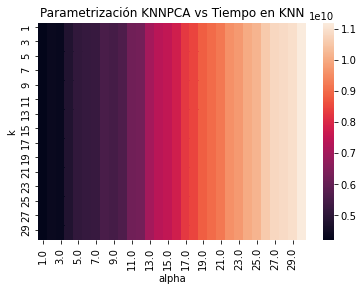

In [8]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='pca_init_and_fit_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

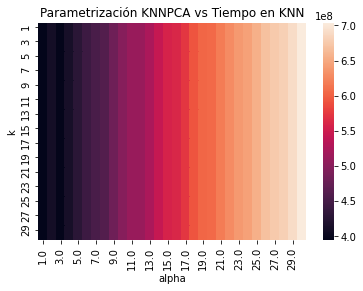

In [9]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='pca_transform_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

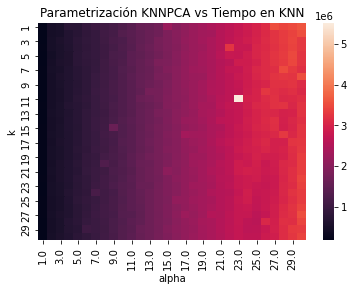

In [10]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='knn_init_and_fit_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

In [11]:
df_knnpca

df_knnpca_accuracy_column = df_knnpca.apply(
    func=lambda row: accuracy_score(row['y_fold_test'], row['y_fold_pred']),
    axis=1
)
df_knnpca_accuracy = df_knnpca[['k']].copy()
df_knnpca_accuracy['alpha'] = df_knnpca['alpha']
df_knnpca_accuracy['accuracy'] = df_knnpca_accuracy_column

df_knnpca_accuracy.head(20)

,k,alpha,accuracy
0,1,1.0,0.239286
1,2,1.0,0.261565
2,3,1.0,0.265646
3,4,1.0,0.270578
4,5,1.0,0.270238
5,6,1.0,0.272279
6,7,1.0,0.273810
7,8,1.0,0.271429
8,9,1.0,0.272959
9,10,1.0,0.273639


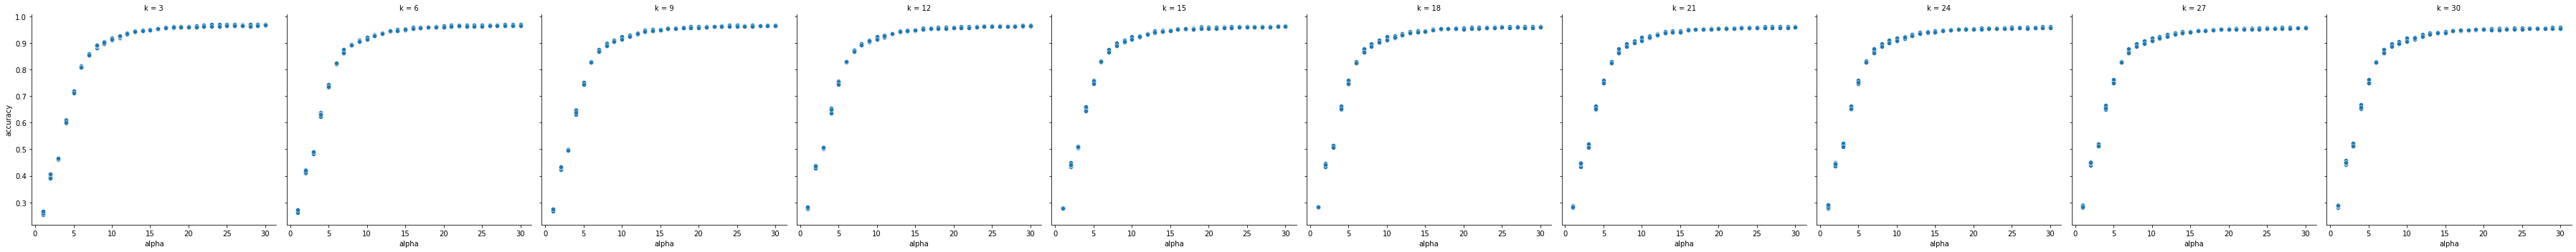

In [12]:
sns.relplot(x="alpha", y="accuracy", col="k", aspect=1, data=df_knnpca_accuracy.query("k%3 == 0"))

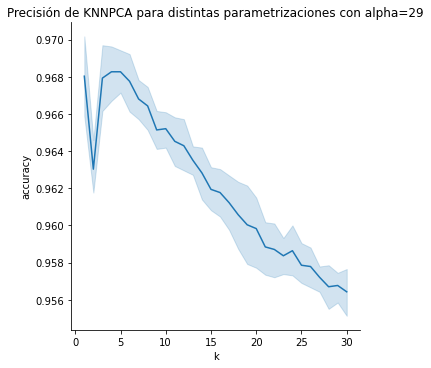

In [13]:
data = df_knnpca_accuracy[df_knnpca_accuracy['alpha'] == 29]

sns.relplot(data=data, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNNPCA para distintas parametrizaciones con alpha=29')

In [14]:
max_knnpca_i = df_knnpca_accuracy['accuracy'].argmax()
max_knnpca_row = df_knnpca.iloc[max_knnpca_i]

max_knn_i = df_knn_accuracy['accuracy'].argmax()
max_knn_row = df_knn.iloc[max_knn_i]

In [15]:
print(df_knnpca_accuracy.iloc[max_knnpca_i])
print(df_knn_accuracy.iloc[max_knn_i])


k            1.000000
alpha       30.000000
accuracy     0.972279
Name: 1170, dtype: float64
k           5.000000
accuracy    0.965816
Name: 4534, dtype: float64


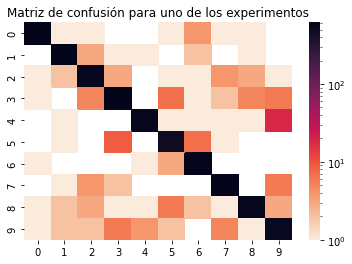

In [16]:
from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(max_knnpca_row['y_fold_test'], max_knnpca_row['y_fold_pred'])

cmap = sns.cm.rocket_r
confusion_heatmap = sns.heatmap(confusion, norm=LogNorm(), cmap=cmap) \
                       .set(title='Matriz de confusión para uno de los experimentos')

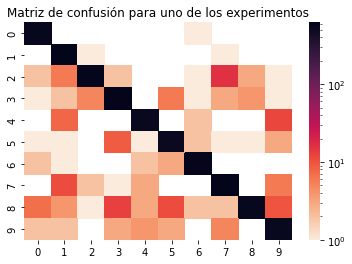

In [17]:
confusion = confusion_matrix(max_knn_row['y_fold_test'], max_knn_row['y_fold_pred'])

cmap = sns.cm.rocket_r
confusion_heatmap = sns.heatmap(confusion, norm=LogNorm(), cmap=cmap) \
                       .set(title='Matriz de confusión para uno de los experimentos')

In [18]:
from sklearn.metrics import cohen_kappa_score

# min_knnpca_i = df_knnpca_accuracy['accuracy'].argmin()
random_knnpca_row = df_knnpca.iloc[100]

cohen_kappa_score(max_knnpca_row['y_pred'], random_knnpca_row['y_pred'])

0.605606482898932